In [1]:
import numpy as np
import pandas as pd 
import selenium
from selenium import webdriver
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
from resizeimage import resizeimage
import random
import os
import imutils
from imutils.video import VideoStream
import cv2
print(os.listdir())

Using TensorFlow backend.


['.ipynb_checkpoints', 'CNN-laboratorium_1.ipynb', 'El Projekto.ipynb', 'geckodriver.exe', 'geckodriver.log', 'keras_Model.h5', 'model_architecture.json', 'model_weights.h5', 'my.png', 'PetImages', 'PetImagesTest', 'RPS', 'RPS TEST', 'test_html.html']


In [2]:
def gra():
    Wynikens = []
    if lista[0] == 'paper' and lista[1] =='paper':
        Wynikens.append('Remis')
        Wynikens.append('Remis')
    if lista[0] == 'scissors' and lista[1] == 'scissors':
        Wynikens.append('Remis')
        Wynikens.append('Remis')
    if lista[0] == 'rock' and lista[1] =='rock':
        Wynikens.append('Remis')
        Wynikens.append('Remis')
    if lista[0] == 'paper' and lista[1] =='rock':
        Wynikens.append('Wygrywa komputer')
        Wynikens.append('Gracz przegrywa')
    if lista[0] == 'paper' and lista[1] =='scissors':
        Wynikens.append('Komputer przegrywa')
        Wynikens.append('Gracz wygrywa')
    if lista[0] == 'rock' and lista[1] =='scissors':
        Wynikens.append('Wygrywa komputer')
        Wynikens.append('Gracz przegrywa')
    if lista[0] == 'rock' and lista[1] =='paper':
        Wynikens.append('Komputer przegrywa')
        Wynikens.append('Gracz wygrywa')
    if lista[0] == 'scissors' and lista[1] =='paper':
        Wynikens.append('Wygrywa komputer')
        Wynikens.append('Gracz przegrywa')
    if lista[0] == 'scissors' and lista[1] =='rock':
        Wynikens.append('Komputer przegrywa')
        Wynikens.append('Gracz wygrywa')
    print(lista)
    return Wynikens

In [3]:
def play():
    driver = webdriver.Firefox(executable_path=r'C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\geckodriver.exe')
    driver.get("file:///C:/Users/sticz/Desktop/Pytong/GSN%20PROJEKT/yy%20moj%20projekt/test_html.html")

In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
filenames = os.listdir(r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS\Mieszany")
categories = []

for filename in filenames:
    category = filename.split(' ')[0]
    
    if category == 'paper':
        categories.append(0)
    elif category == 'rock':
        categories.append(1)
    elif category == 'scissors':
        categories.append(2)
    else:
        categories.append(3)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
df.head()

,filename,category
0,paper (1).png,0
1,paper (10).png,0
2,paper (100).png,0
3,paper (101).png,0
4,paper (102).png,0


In [7]:
df.tail()

,filename,category
1795,scissors (95).png,2
1796,scissors (96).png,2
1797,scissors (97).png,2
1798,scissors (98).png,2
1799,scissors (99).png,2


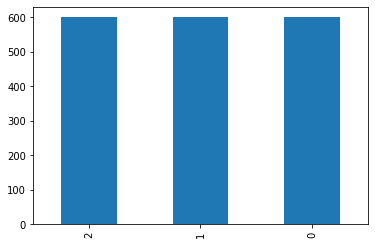

In [8]:
df['category'].value_counts().plot.bar()

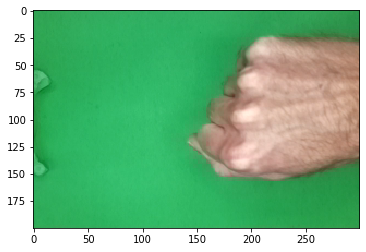

In [9]:
sample = random.choice(filenames)
image = load_img(r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS\Mieszany\\"+sample)
plt.imshow(image)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) # 3 classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)  
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2,  verbose=1, factor=0.5, min_lr=0.00001)

In [12]:
callbacks = [earlystop, learning_rate_reduction]

In [13]:
df["category"] = df["category"].replace({0: 'paper', 1: 'rock', 2: 'scissors'}) 

In [14]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

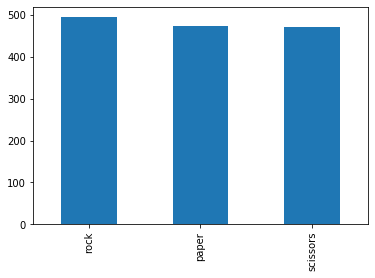

In [15]:
train_df['category'].value_counts().plot.bar()

In [16]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [17]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS\Mieszany", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1440 validated image filenames belonging to 3 classes.


In [18]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS\Mieszany", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 360 validated image filenames belonging to 3 classes.


In [19]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS\Mieszany", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


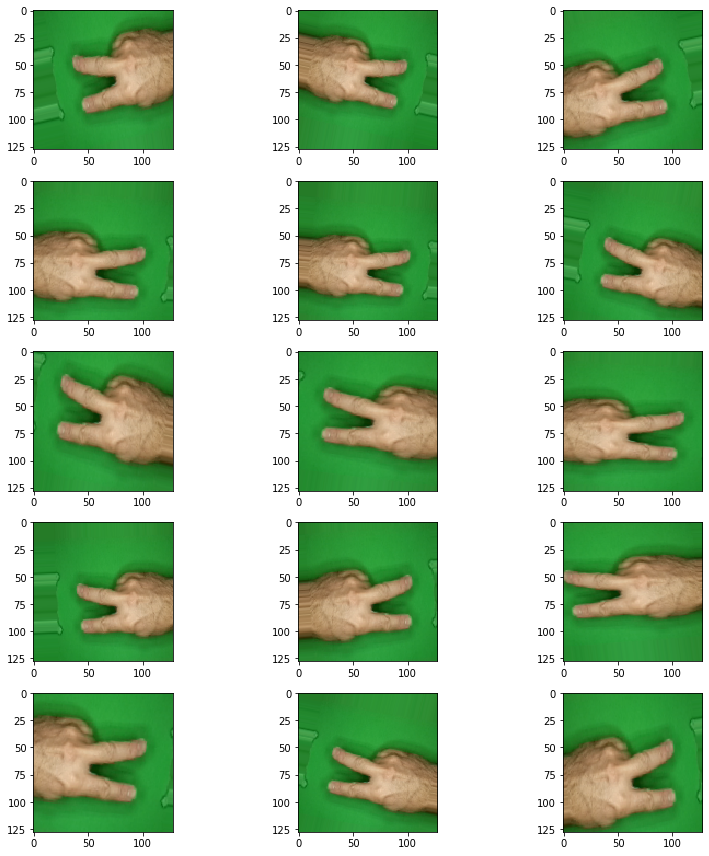

In [20]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [21]:
epochs=3 if FAST_RUN else 7
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/7
96/96 [==============================] - 55s 577ms/step - loss: 1.1192 - accuracy: 0.6382 - val_loss: 6.8939 - val_accuracy: 0.3556
Epoch 2/7


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


96/96 [==============================] - 54s 562ms/step - loss: 0.6120 - accuracy: 0.7917 - val_loss: 2.0404 - val_accuracy: 0.4583
Epoch 3/7
96/96 [==============================] - 55s 568ms/step - loss: 0.4715 - accuracy: 0.8486 - val_loss: 2.6238 - val_accuracy: 0.4583
Epoch 4/7
96/96 [==============================] - 53s 554ms/step - loss: 0.2966 - accuracy: 0.9021 - val_loss: 1.5834 - val_accuracy: 0.6556
Epoch 5/7
96/96 [==============================] - 51s 526ms/step - loss: 0.2730 - accuracy: 0.9097 - val_loss: 6.0504 - val_accuracy: 0.6083
Epoch 6/7
96/96 [==============================] - 51s 533ms/step - loss: 0.2269 - accuracy: 0.9264 - val_loss: 0.2542 - val_accuracy: 0.8083
Epoch 7/7
96/96 [==============================] - 54s 560ms/step - loss: 0.2109 - accuracy: 0.9361 - val_loss: 2.8716e-04 - val_accuracy: 0.9778


In [22]:
test_filenames = os.listdir(r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS TEST")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [23]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS TEST", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 336 validated image filenames.


In [24]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

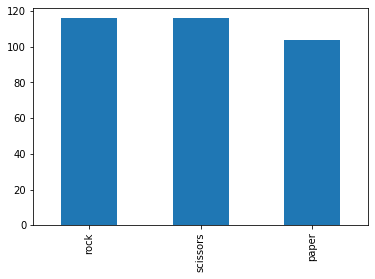

In [25]:
test_df['category'].value_counts().plot.bar()

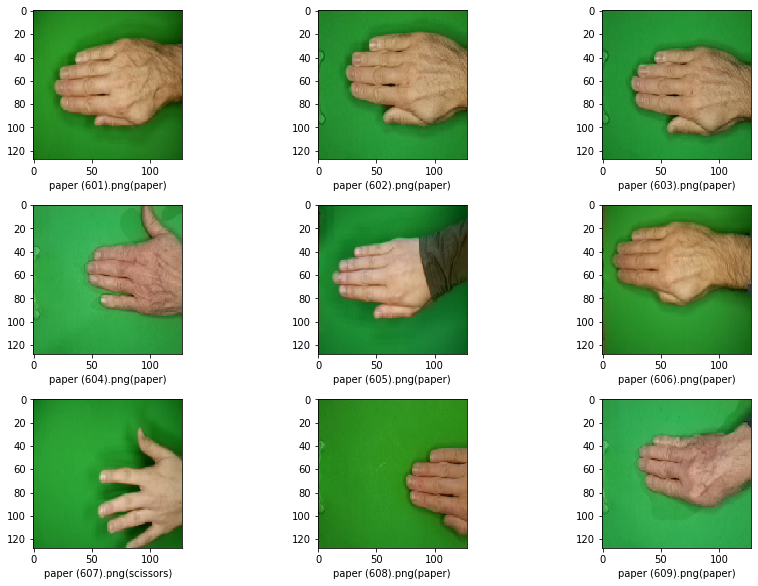

In [26]:
sample_test = test_df.head(9)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS TEST\\" +filename, target_size=IMAGE_SIZE)
    plt.subplot(9, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

<h1>Gra 2x komputer <h1>

In [27]:
sample_test = test_df.sample(2)
sample_test

,filename,category
240,scissors (617).png,scissors
328,scissors (705).png,scissors


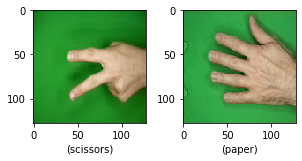

In [28]:
sample_test = test_df.sample(2)
sample_test.head(2)
plt.figure(figsize=(50, 48))
a = 0
lista = []
for index, row in sample_test.iterrows():
    index = a
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS TEST\\" +filename, target_size=IMAGE_SIZE)
    plt.subplot(9, 24, index+1)
    plt.imshow(img)
    plt.xlabel('(' + "{}".format(category) + ')' ) #filename + 
    a = a+1
    lista.append(category)
plt.tight_layout()
plt.show()

In [29]:
gra()

['scissors', 'paper']


['Wygrywa komputer', 'Gracz przegrywa']

<h1>Zapis modelu<h1>

In [30]:
# Zapisywanie i ponowne wczytywanie modelu
# pełny model
model.save('keras_Model.h5')
# wczytywanie pełnego modelu
new_model = keras.models.load_model('keras_Model.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

In [31]:
from keras.models import model_from_json
# zapisywanie architektury modelu do pliku JSON
json_config = model.to_json()
reinitialized_model = keras.models.model_from_json(json_config)
with open("model_architecture.json", "w") as f:
    f.write(json_config)   
# zapisywanie wag
model.save_weights('model_weights.h5')
# wczytanie architektury i wag
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

<h1>Gra - gracz vs komputer, predykcja gracza<h1>

In [55]:
from PIL import Image

In [56]:
def smile():
    vs = VideoStream(src=0, resolution =(320,240)).start()
    while True:
        frame=vs.read()
        frame = vs.read()
        frame = imutils.resize(frame, width=300, height=200)
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q'):
            break
    vs.stop()
    cv2.destroyAllWindows()

    
    photo = Image.fromarray(frame, 'RGB')
    photo.save('my.png')
    photo.show()  
    return photo

In [68]:
photo = smile()

In [69]:
photo = resizeimage.resize_cover(photo, [128, 128])

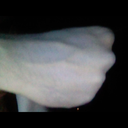

In [70]:
photo

In [71]:
print(photo)

<PIL.Image.Image image mode=RGB size=128x128 at 0x1BF102AF448>


In [72]:
photo_array = np.asarray(photo)

In [73]:
phottto = np.expand_dims(photo, axis=0)

In [74]:
def predykcja():
    predykcja = model.predict(phottto, batch_size=None, verbose=1, 
    steps=None, callbacks=callbacks, max_queue_size=10, workers=1, use_multiprocessing=False)
    return predykcja

In [75]:
arrayo = predykcja()
listaa=[]
arrayo = arrayo.astype(int)
listaa.append(arrayo[0])
arrayo = listaa[0]
print(arrayo)

1/1 [==============================] - 0s 13ms/step
[0 1 0]


In [76]:
def predykcja1():
    a = arrayo
    Wynik = []
    if (a[0] == 1):
        Wynik.append("paper")
    elif(a[1] == 1):
        Wynik.append("rock")
    elif(a[2] == 1):
        Wynik.append("scissors")
    else:
        Wynik.append("Errorero")
    return Wynik


In [77]:
predykcja2 = predykcja1()

In [78]:
predykcja2[0]

'rock'

<h1>Gra - gracz vs komputer, predykcja komputera<h1>

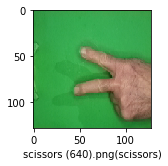

In [79]:
sample_test = test_df.sample(1)
sample_test.head(1)
plt.figure(figsize=(50, 48))
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
a = 0
lista = []
for index, row in sample_test.iterrows():
    index = a
    filename = row['filename']
    category = row['category']
    img = load_img(r"C:\Users\sticz\Desktop\Pytong\GSN PROJEKT\yy moj projekt\RPS TEST\\" +filename, target_size=IMAGE_SIZE)
    plt.subplot(9, 24, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' ) #filename + 
    a = a+1
    lista.append(category)
    lista.append(predykcja2[0])
plt.tight_layout()
plt.show()

<h1>Gra - gracz vs komputer, display<h1>

In [80]:
lista

['scissors', 'rock']

In [81]:
gra()

['scissors', 'rock']


['Komputer przegrywa', 'Gracz wygrywa']

In [82]:
print(filename)
print(sample_test)

scissors (640).png
               filename  category
263  scissors (640).png  scissors


In [83]:
import pandas as pd
from IPython.core.display import HTML

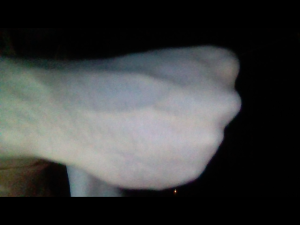

In [84]:
from PIL import Image 
Image.open("my.png")

In [85]:
dff = pd.DataFrame(['./RPS TEST/' +filename,'my.png',], columns = ['Obraz'])

In [86]:
dff.update(dff)

In [87]:
import pandas as pd
import IPython
from IPython.display import Image, HTML,clear_output

def path_to_image_html(path):
    return '<img src="'+ path + '"/>'

pd.set_option('display.max_colwidth', -1)

dff.to_html('test_html.html', escape=False, formatters=dict(Obraz=path_to_image_html))
dff.update(dff)

In [88]:
Wynik = []
Wynik = gra()

['scissors', 'rock']


In [89]:
d = {'Predykcja': lista, 'Kto?': ['Komputer','Gracz'], 'Wynik':Wynik}
df = pd.DataFrame(data=d)

In [90]:
dff

,Obraz
0,./RPS TEST/scissors (640).png
1,my.png


In [91]:
df

,Predykcja,Kto?,Wynik
0,scissors,Komputer,Komputer przegrywa
1,rock,Gracz,Gracz wygrywa


In [92]:
ARD = dff.join(df)

In [93]:
ARD

,Obraz,Predykcja,Kto?,Wynik
0,./RPS TEST/scissors (640).png,scissors,Komputer,Komputer przegrywa
1,my.png,rock,Gracz,Gracz wygrywa


In [94]:
import pandas as pd
import IPython
from IPython.display import Image, HTML

def path_to_image_html(path):
    return '<img src="'+ path + '"/>'

pd.set_option('display.max_colwidth', -1)

ARD.to_html('test_html.html', escape=False, formatters=dict(Obraz=path_to_image_html))
ARD.update(ARD)

<h1>Gra - gracz vs komputer, finał<h1>

In [95]:
play()